# Trabalho 03

Link do dataset: https://www.kaggle.com/mboaglio/simplifiedhuarus?select=test.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Importação dos dados

In [11]:
df = pd.read_csv('simplified_human_activity.csv')

In [12]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


## Pré-processamento e Analise de dados

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
print('Label: ', df['activity'].unique())

Label:  ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS' nan]


<AxesSubplot:>

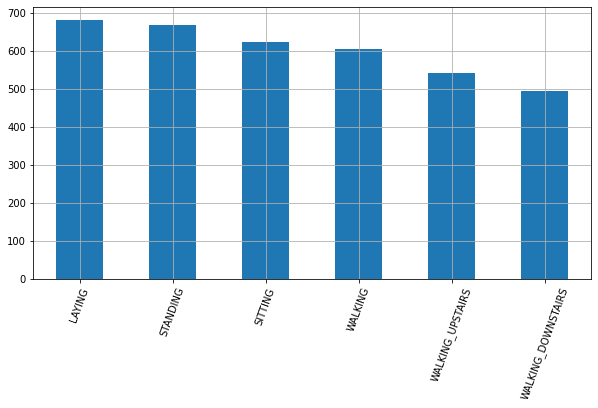

In [23]:
df['activity'].value_counts().plot.bar(rot=70, grid=True, figsize=(10,5))

In [24]:
# Retirando os valores null
df.dropna(subset=['activity'], inplace=True)

In [26]:
# Retirando a labels
label = df['activity']
df.drop(columns=['activity', 'rn'], inplace=True)

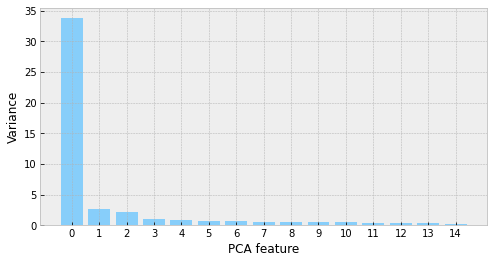

In [98]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(df)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [44]:
pca = PCA(n_components=2)

In [45]:
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['col1', 'col2'])

<AxesSubplot:xlabel='col1', ylabel='col2'>

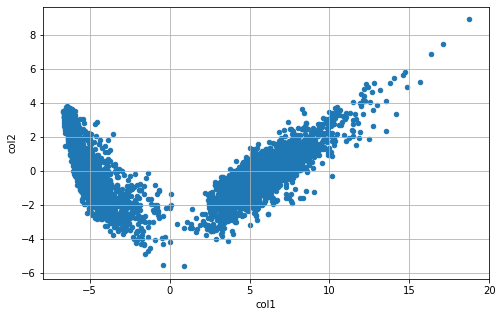

In [46]:
df_pca.plot.scatter(x='col1', y='col2', figsize=(8,5), grid=True)

In [62]:
replace = {
    'STANDING': 1, 
    'SITTING': 2, 
    'LAYING': 3, 
    'WALKING': 4, 
    'WALKING_DOWNSTAIRS': 5,
    'WALKING_UPSTAIRS': 6
}

In [63]:
label = [replace[l] for l in label]

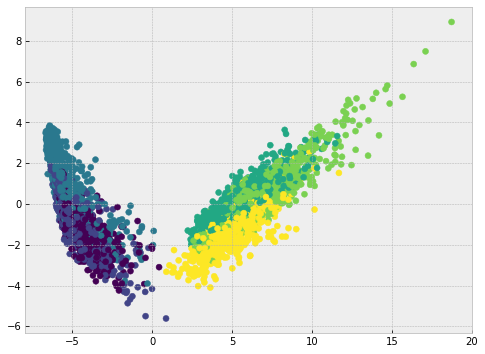

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=label)

plt.show()

## Uso de técnicas de clusterização

- Usar k-Means, DBScan e Clusterização Hierárquica
- Avaliação dos resultados

In [86]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# SciPy hierarchical clustering
from scipy.cluster import hierarchy

### KMeans

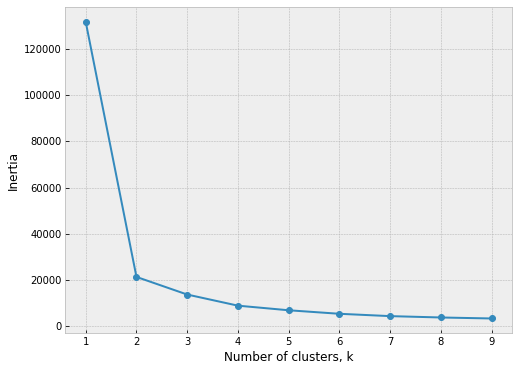

In [87]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,6))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Inércia =  8813.063868924779


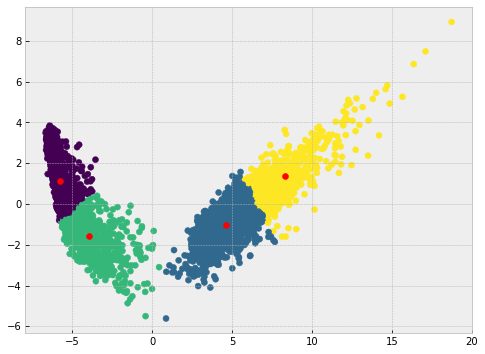

In [96]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

print("Inércia = ", kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], c='red')

plt.show()

### AgglomerativeClustering

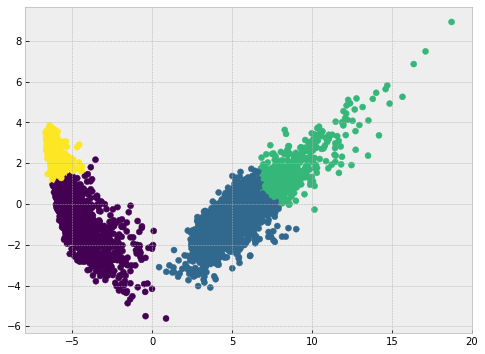

In [99]:
# {“ward”, “complete”, “average”}
linkage = 'ward'

agglomerative = AgglomerativeClustering(linkage=linkage, n_clusters=4)
agglomerative.fit(df_pca)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=agglomerative.labels_)

plt.show()

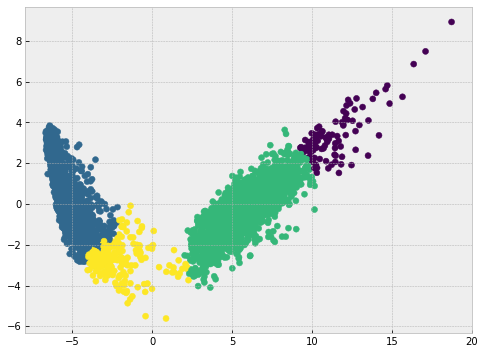

In [100]:
# {“ward”, “complete”, “average”}
linkage = 'complete'

agglomerative = AgglomerativeClustering(linkage=linkage, n_clusters=4)
agglomerative.fit(df_pca)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=agglomerative.labels_)

plt.show()

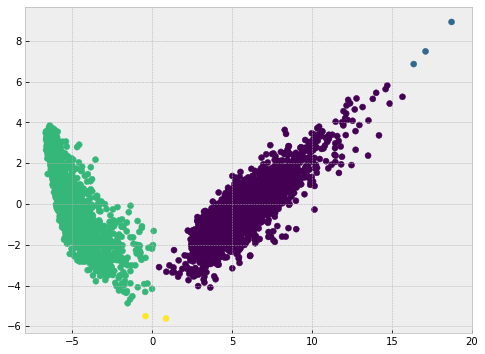

In [102]:
# {“ward”, “complete”, “average”}
linkage = 'average'

agglomerative = AgglomerativeClustering(linkage=linkage, n_clusters=4)
agglomerative.fit(df_pca)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=agglomerative.labels_)

plt.show()

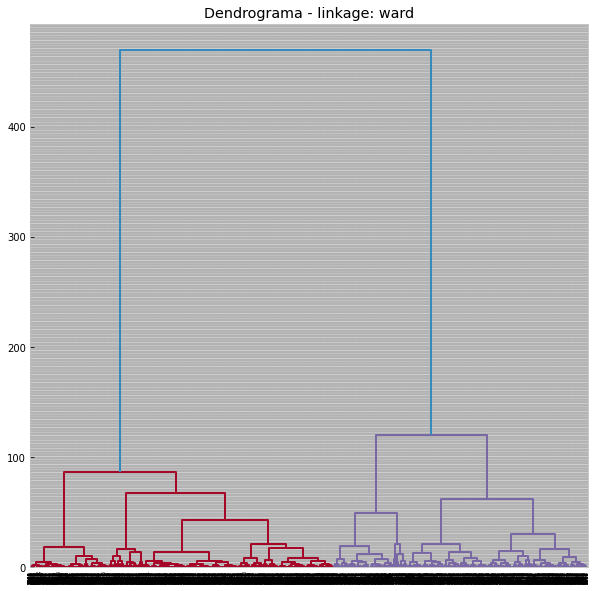

In [103]:
# {“ward”, “complete”, “average”}
linkage = 'ward'

if (linkage == 'average'):
    Z = hierarchy.average(df_pca)
elif (linkage == 'complete'):
    Z = hierarchy.complete(df_pca)
elif (linkage == 'ward'):
    Z = hierarchy.ward(df_pca)

plt.figure(figsize=(10, 10))
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

### DBSCAN

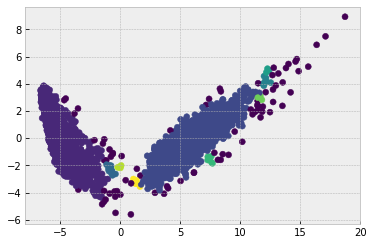

In [110]:
dbsacan = DBSCAN(eps=0.35, min_samples=4)
dbsacan.fit(df_pca)

plt.scatter(df_pca['col1'], df_pca['col2'], c=dbsacan.labels_)
plt.show()

## Analise dos resultados

In [104]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
# from sklearn.metrics import confusion_matrix

In [106]:
print(f'Silhouette Score(n=2): {silhouette_score(df_pca, label, random_state=42)}')

Silhouette Score(n=2): 0.03743622862542174


In [108]:
kmeans = KMeans(n_clusters=4)
predicted_labels = kmeans.fit_predict(df_pca)

adjusted_rand_score(predicted_labels, label)

0.329682526946172

In [109]:
linkage = 'ward'

agglomerative = AgglomerativeClustering(linkage=linkage, n_clusters=4)
predicted_labels = agglomerative.fit_predict(df_pca)

adjusted_rand_score(predicted_labels, label)

0.35347454347469526

In [111]:
dbsacan = DBSCAN(eps=0.35, min_samples=4)
predicted_labels = dbsacan.fit_predict(df_pca)

adjusted_rand_score(predicted_labels, label)

0.32610501237253997